In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

---
---
---

# Summer Olympics Data Analysis Assignment

In [ ]:
data=pd.read_csv("https://git.io/Juica")
data.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31165 entries, 0 to 31164
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        31165 non-null  int64 
 1   City        31165 non-null  object
 2   Sport       31165 non-null  object
 3   Discipline  31165 non-null  object
 4   Athlete     31165 non-null  object
 5   Country     31161 non-null  object
 6   Gender      31165 non-null  object
 7   Event       31165 non-null  object
 8   Medal       31165 non-null  object
dtypes: int64(1), object(8)
memory usage: 2.1+ MB


In [ ]:
data.describe(include='all')

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
count,31165.000000,31165,31165,31165,31165,31161,31165,31165,31165
unique,NaN,22,43,67,22762,147,2,666,3
top,NaN,London,Aquatics,Athletics,"PHELPS, Michael",USA,Men,Football,Gold
freq,NaN,3567,4170,3638,22,4585,22746,1497,10486
mean,1970.482785,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,33.158416,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1896.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,1948.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,1980.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


---
---

### 1. In how many cities Summer Olympics is held so far?

In [ ]:
print("Summer Olympics is held in total",len(data['City'].unique()),"cities")

Summer Olympics is held in total 22 cities


---

### 2. Which sport is having most number of Gold Medals so far? (Top 5)

#### Method - I

In [ ]:
data.filter(items=["Sport","Medal"]).query('Medal=="Gold"').groupby('Sport').size().sort_values(ascending=False).head()

Sport
Aquatics      1421
Athletics     1215
Rowing         890
Gymnastics     820
Fencing        552
dtype: int64

#### Method - II

In [ ]:
d=dict()
for i in data['Sport'].unique():
  d[i]=len(data.loc[(data['Sport']==i) & (data['Medal']=='Gold')])
d=sorted(d.items(), key=lambda item: item[1])
d.reverse()
df=pd.DataFrame(d,columns=['Sport','Gold Medals'])
df.head()

,Sport,Gold Medals
0,Aquatics,1421
1,Athletics,1215
2,Rowing,890
3,Gymnastics,820
4,Fencing,552


Text(0.5, 1.0, 'TOP 5 Sports Having Most Number of Gold Medals')

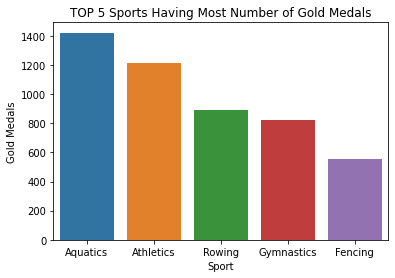

In [ ]:
sns.barplot(x=df['Sport'][:5],y=df['Gold Medals'][:5]).set_title("TOP 5 Sports Having Most Number of Gold Medals")

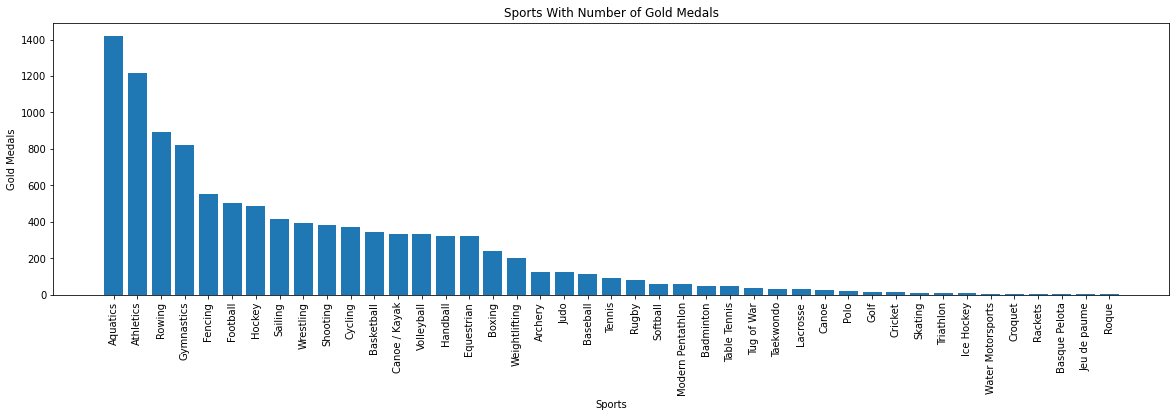

In [ ]:
fig = plt.figure(figsize=(20, 5))
plt.bar(df['Sport'],df['Gold Medals'])
plt.xlabel("Sports")
plt.xticks(rotation=90)
plt.ylabel("Gold Medals")
plt.title("Sports With Number of Gold Medals")
plt.show()

---

### 3. Which sport is having most number of medals so far? (Top 5)

In [ ]:
data['Medal'].describe()

count     31165
unique        3
top        Gold
freq      10486
Name: Medal, dtype: object

In [ ]:
data['Medal'].isnull().any()

False

#### Method - I

In [ ]:
data.groupby('Sport').size().sort_values(ascending=False).head()

Sport
Aquatics      4170
Athletics     3638
Rowing        2667
Gymnastics    2307
Fencing       1613
dtype: int64

#### Method - II

In [ ]:
d=dict()
for i in data['Sport'].unique():
  d[i]=len(data.loc[(data['Sport']==i)])
d=sorted(d.items(), key=lambda item: item[1])
d.reverse()
df=pd.DataFrame(d,columns=['Sport','Medals'])
df.head()

,Sport,Medals
0,Aquatics,4170
1,Athletics,3638
2,Rowing,2667
3,Gymnastics,2307
4,Fencing,1613


Text(0.5, 1.0, 'TOP 5 Sports Having Most Number of Medals')

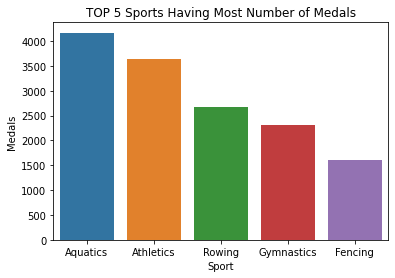

In [ ]:
sns.barplot(x=df['Sport'][:5],y=df['Medals'][:5]).set_title("TOP 5 Sports Having Most Number of Medals")

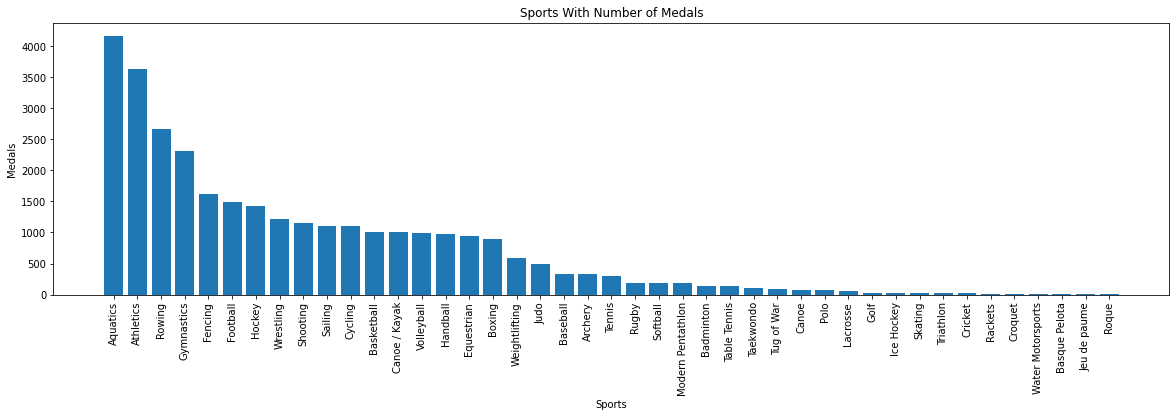

In [ ]:
fig = plt.figure(figsize=(20, 5))
plt.bar(df['Sport'],df['Medals'])
plt.xlabel("Sports")
plt.xticks(rotation=90)
plt.ylabel("Medals")
plt.title("Sports With Number of Medals")
plt.show()

---

### 4. Which player has won most number of medals? (Top 5)

#### Method - I

In [ ]:
data.groupby('Athlete').size().sort_values(ascending=False).head()

Athlete
PHELPS, Michael         22
LATYNINA, Larisa        18
ANDRIANOV, Nikolay      15
MANGIAROTTI, Edoardo    13
SHAKHLIN, Boris         13
dtype: int64

#### Method - II

In [ ]:
d=dict()
for i in data['Athlete'].unique():
  d[i]=len(data.loc[(data['Athlete']==i)])
d=sorted(d.items(), key=lambda item: item[1])
d.reverse()
df=pd.DataFrame(d,columns=['Athlete','Medals'])
df.head()

,Athlete,Medals
0,"PHELPS, Michael",22
1,"LATYNINA, Larisa",18
2,"ANDRIANOV, Nikolay",15
3,"SHAKHLIN, Boris",13
4,"ONO, Takashi",13


here many more players who have 13 medals so your order may give diffrenet names as they also have same 13 medals but its after all correct

Text(0.5, 1.0, 'TOP 5 Players Having Most Number of Medals')

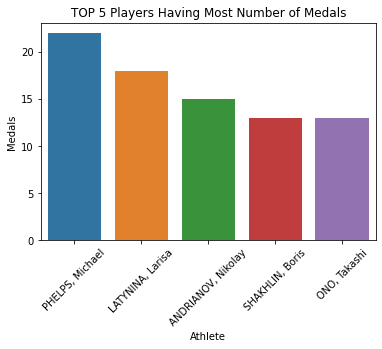

In [ ]:
graph=sns.barplot(x=df['Athlete'][:5],y=df['Medals'][:5])
graph.set_xticklabels(graph.get_xticklabels(), rotation=45)
graph.set_title("TOP 5 Players Having Most Number of Medals")

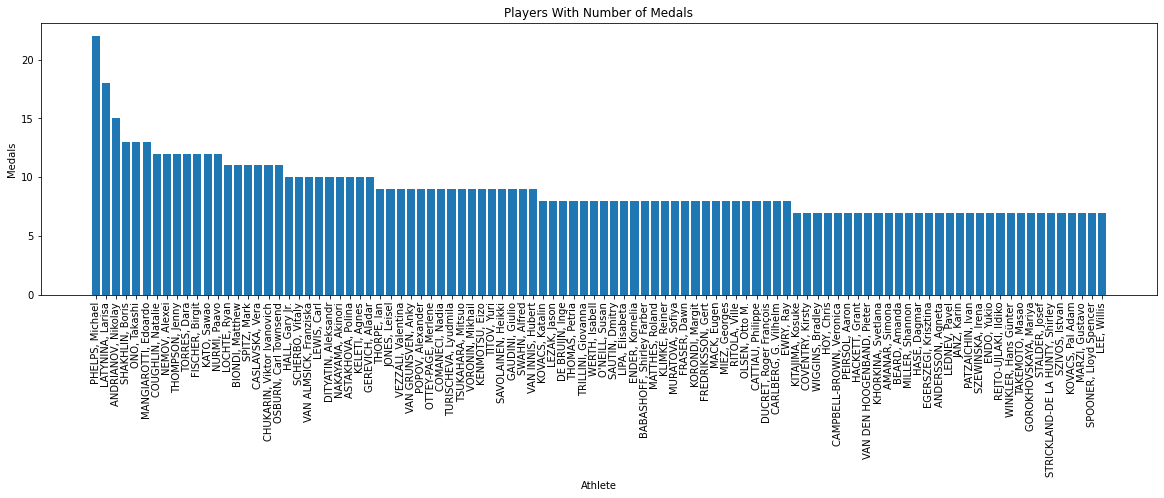

In [ ]:
fig = plt.figure(figsize=(20, 5))
plt.bar(df['Athlete'][:100],df['Medals'][:100])
plt.xlabel("Athlete")
plt.xticks(rotation=90)
plt.ylabel("Medals")
plt.title("Players With Number of Medals")
plt.show()

---

### 5. Which player has won most number Gold Medals of medals? (Top 5)

#### Method - I

In [ ]:
data.filter(items=["Athlete","Medal"]).query('Medal=="Gold"').groupby('Athlete').size().sort_values(ascending=False).head()

Athlete
PHELPS, Michael     18
NURMI, Paavo         9
SPITZ, Mark          9
LEWIS, Carl          9
LATYNINA, Larisa     9
dtype: int64

#### Method - II

In [ ]:
d=dict()
for i in data['Athlete'].unique():
  d[i]=len(data.loc[(data['Athlete']==i) & (data['Medal']=='Gold')])
d=sorted(d.items(), key=lambda item: item[1])
d.reverse()
df=pd.DataFrame(d,columns=['Athlete','Gold Medals'])
df.head()

,Athlete,Gold Medals
0,"PHELPS, Michael",18
1,"LEWIS, Carl",9
2,"SPITZ, Mark",9
3,"LATYNINA, Larisa",9
4,"NURMI, Paavo",9


here many more players who have 9 medals so your order may give diffrenet names as they also have same 9 medals but its after all correct

Text(0.5, 1.0, 'TOP 5 Players Having Most Number of Gold Medals')

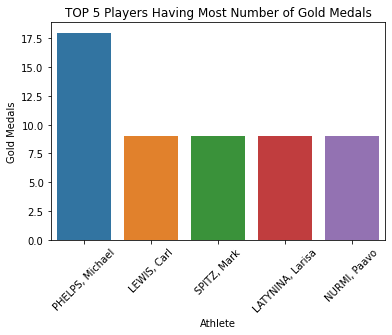

In [ ]:
graph=sns.barplot(x=df['Athlete'][:5],y=df['Gold Medals'][:5])
graph.set_xticklabels(graph.get_xticklabels(), rotation=45)
graph.set_title("TOP 5 Players Having Most Number of Gold Medals")

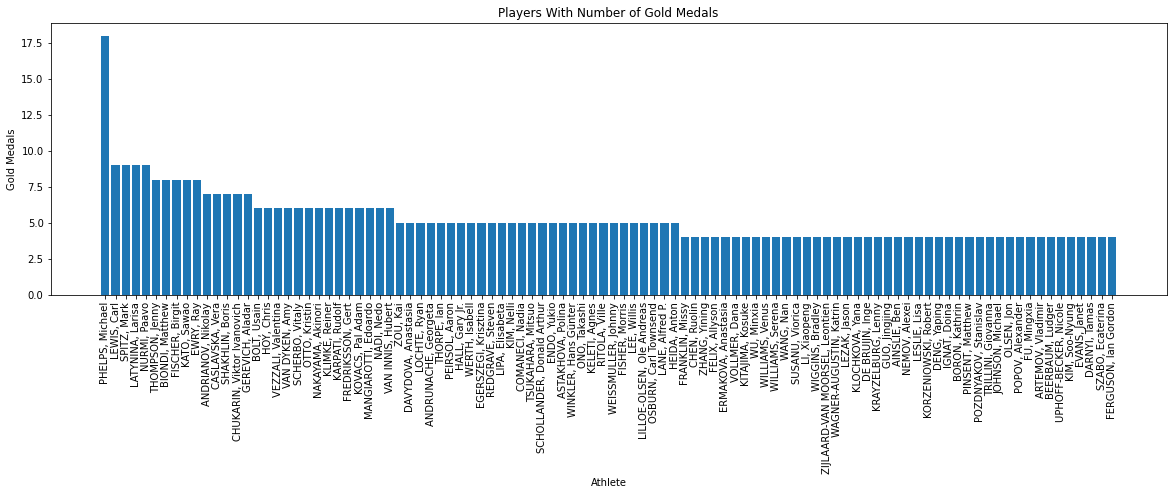

In [ ]:
fig = plt.figure(figsize=(20, 5))
plt.bar(df['Athlete'][:100],df['Gold Medals'][:100])
plt.xlabel("Athlete")
plt.xticks(rotation=90)
plt.ylabel("Gold Medals")
plt.title("Players With Number of Gold Medals")
plt.show()

---

### 6. In which year India won first Gold Medal in Summer Olympics?

#### Method - I

In [ ]:
data.filter(items=["Country","Medal",'Year']).query('Medal=="Gold"').query('Country=="IND"').groupby('Year').size().head(1)

Year
1928    15
dtype: int64

#### Method - II

In [ ]:
m=9999999
for i in range(len(data['Medal'])):
  if(data['Country'][i]=='IND' and data['Medal'][i]=='Gold'):
    if(data['Year'][i]<m):
      m=data['Year'][i]
print("Year in which India won its first Gold Medal :- ",m)

Year in which India won its first Gold Medal :-  1928


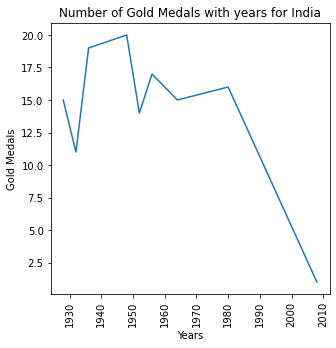

In [ ]:
df=data.filter(items=["Country","Medal",'Year']).query('Medal=="Gold"').query('Country=="IND"').groupby('Year').size()
l=list(df.index)
df=list(df)
fig = plt.figure(figsize=(5, 5))
plt.plot(l,df)
plt.xlabel("Years")
plt.xticks(rotation=90)
plt.ylabel("Gold Medals")
plt.title("Number of Gold Medals with years for India")
plt.show()

---

### 7. Which event is most popular in terms on number of players? (Top 5)


#### Method - I

In [ ]:
data.filter(items=["Event","Athlete"]).groupby('Event').size().sort_values(ascending=False).head()

Event
Football            1497
Hockey              1422
Team Competition    1147
Basketball          1012
Handball             973
dtype: int64

#### Method - II

In [ ]:
d=dict()
for i in data['Event'].unique():
  d[i]=len(data.loc[(data['Event']==i)])
d=sorted(d.items(), key=lambda item: item[1])
d.reverse()
df=pd.DataFrame(d,columns=['Event','Athlete'])
df.head()

,Event,Athlete
0,Football,1497
1,Hockey,1422
2,Team Competition,1147
3,Basketball,1012
4,Handball,973


Text(0.5, 1.0, 'TOP 5 most popular Events in terms on number of players')

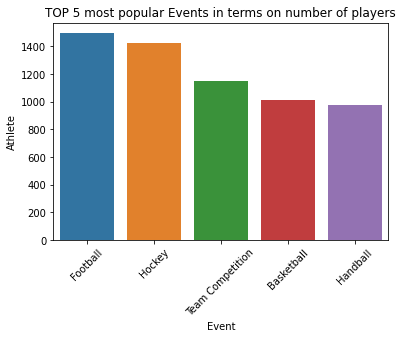

In [ ]:
graph=sns.barplot(x=df['Event'][:5],y=df['Athlete'][:5])
graph.set_xticklabels(graph.get_xticklabels(), rotation=45)
graph.set_title("TOP 5 most popular Events in terms on number of players")

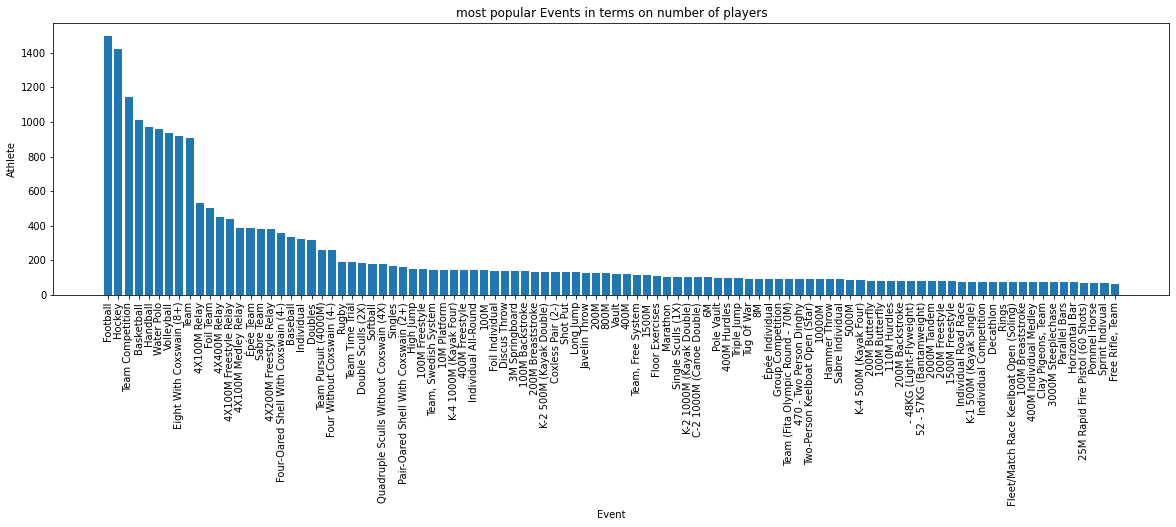

In [ ]:
fig = plt.figure(figsize=(20, 5))
plt.bar(df['Event'][:100],df['Athlete'][:100])
plt.xlabel("Event")
plt.xticks(rotation=90)
plt.ylabel("Athlete")
plt.title("most popular Events in terms on number of players")
plt.show()

---

### 8. Which sport is having most female Gold Medalists? (Top 5)

In [ ]:
data['Gender'].unique()

array(['Men', 'Women'], dtype=object)

#### Method - I

In [ ]:
data.filter(items=["Sport","Medal","Gender"]).query('Gender=="Women"').query('Medal=="Gold"').groupby('Sport').size().sort_values(ascending=False).head()

Sport
Aquatics      589
Athletics     389
Gymnastics    268
Rowing        217
Volleyball    166
dtype: int64

#### Method - II

In [ ]:
d=dict()
for i in data['Sport'].unique():
  d[i]=len(data.loc[(data['Sport']==i) & (data['Gender']=='Women') & (data['Medal']=='Gold')])
d=sorted(d.items(), key=lambda item: item[1])
d.reverse()
df=pd.DataFrame(d,columns=['Sport','Women'])
df.head()

,Sport,Women
0,Aquatics,589
1,Athletics,389
2,Gymnastics,268
3,Rowing,217
4,Volleyball,166


Text(0.5, 1.0, 'TOP 5 Sports having most female Gold Medalists')

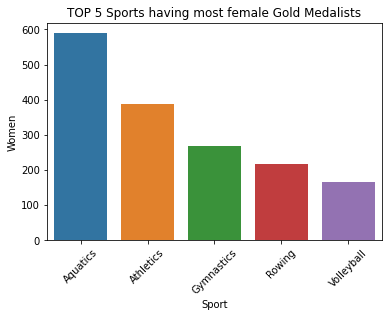

In [ ]:
graph=sns.barplot(x=df['Sport'][:5],y=df['Women'][:5])
graph.set_xticklabels(graph.get_xticklabels(), rotation=45)
graph.set_title("TOP 5 Sports having most female Gold Medalists")

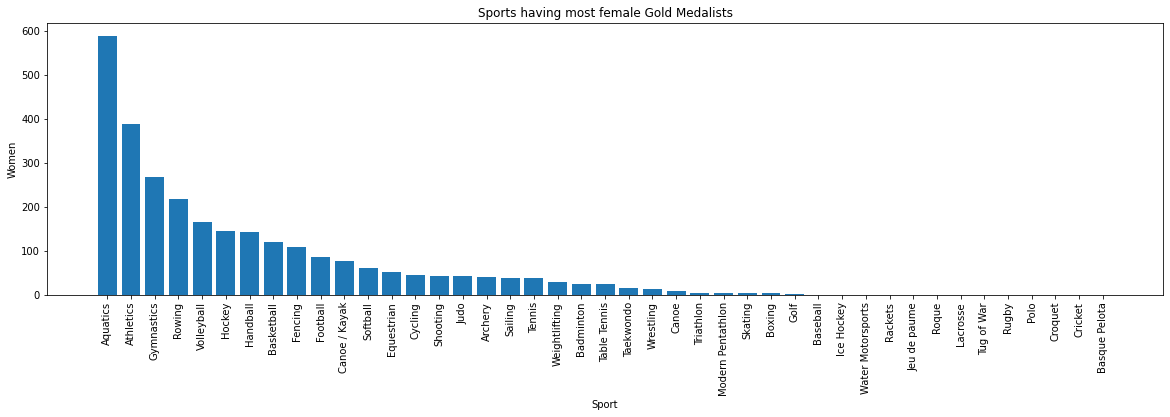

In [ ]:
fig = plt.figure(figsize=(20, 5))
plt.bar(df['Sport'],df['Women'])
plt.xlabel("Sport")
plt.xticks(rotation=90)
plt.ylabel("Women")
plt.title("Sports having most female Gold Medalists")
plt.show()

---

---
---
----------------------------------------------------------------------------THANK YOU----------------------------------------------------------------
---
---
---